In [ ]:
# Answer 1)
Gradient Boosting Regression is a machine learning technique used for regression tasks, which involves predicting a continuous output variable. It is an ensemble learning method that combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model.

Here's a brief overview of how Gradient Boosting Regression works:

1. **Initialization:** The algorithm starts with an initial prediction, usually the mean or median of the target variable.

2. **Building Trees (Weak Learners):** A series of weak learners, often decision trees, are sequentially added to the model. Each tree is trained to correct the errors made by the combination of the existing trees.

3. **Weighted Combination:** The predictions of all the weak learners are combined, and each tree's contribution is weighted based on its performance and the error it helps reduce. The weights are determined through a process of gradient descent, where the algorithm minimizes the residual errors.

4. **Iterative Process:** The process of adding trees and updating weights is repeated for a predefined number of iterations or until a specified level of performance is achieved.

5. **Final Prediction:** The final prediction is the sum of the initial prediction and the contributions from all the weak learners.

Gradient Boosting Regression is known for its high predictive accuracy and robustness. Popular implementations of Gradient Boosting Regression include XGBoost, LightGBM, and scikit-learn's GradientBoostingRegressor. These implementations often include additional optimizations and features to enhance performance and flexibility.

/tmp/ipykernel_110/3512682308.py:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_pred = np.sum(self.learning_rate * tree.predict(X) for tree in self.models)
/tmp/ipykernel_110/3512682308.py:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_pred = np.sum(self.learning_rate * tree.predict(X) for tree in self.models)
/tmp/ipykernel_110/3512682308.py:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_pred = np.sum(self.learning_rate * tree.predict(X) for tree in self.models)
/tmp/ipykernel_110/3512682308.py:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the fut

Mean Squared Error: 95.13779746436367
R-squared: -1.5931197810079305


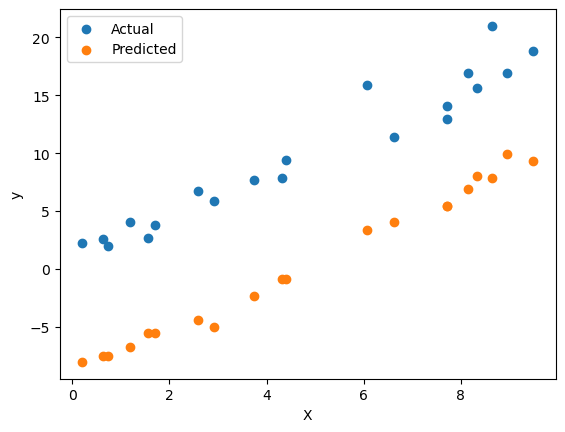

In [2]:
# Answer 2)
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100) * 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Initialize with the mean of the target variable
        y_pred = np.full_like(y, np.mean(y))

        for _ in range(self.n_estimators):
            # Calculate the negative gradient (residuals)
            residuals = y - y_pred

            # Fit a decision tree to the residuals
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, residuals)

            # Make predictions with the current tree and update the ensemble
            y_pred += self.learning_rate * tree.predict(X)
            self.models.append(tree)

    def predict(self, X):
        # Make predictions by summing the predictions from all trees
        y_pred = np.sum(self.learning_rate * tree.predict(X) for tree in self.models)
        return y_pred

# Create and train the gradient boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = np.array([gb_model.predict(np.array([x])) for x in X_test])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()




In [ ]:
# Answer 3)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

# Create the gradient boosting model
gb_model = GradientBoostingRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_best = np.array([best_model.predict(np.array([x])) for x in X_test])

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Mean Squared Error: {mse_best}")
print(f"Best R-squared: {r2_best}")


In [ ]:
# Answer 4)
In the context of Gradient Boosting, a weak learner refers to a model that performs slightly better than random chance on a particular task. In the case of regression problems, weak learners are typically shallow decision trees. These are decision trees with limited depth, often referred to as "stumps" when they consist of just one node and two leaves.

The key characteristic of a weak learner is its limited predictive power and complexity. Weak learners are not expected to make accurate predictions on their own, but they contribute incrementally to the overall predictive power of the ensemble when combined with other weak learners.

In the context of Gradient Boosting, the algorithm builds a series of weak learners sequentially, with each new learner focusing on correcting the errors made by the combined predictions of the existing ensemble. The process involves fitting a weak learner to the residuals (the differences between the predicted and true values) of the current ensemble. By doing so, each weak learner improves the overall model by addressing the mistakes of its predecessors.

While decision trees are commonly used as weak learners, other models like linear regression models or shallow neural networks can also serve this purpose. The choice of weak learner may depend on the specific characteristics of the dataset and the problem at hand. The success of Gradient Boosting relies on the ability of weak learners to capture and correct the remaining errors in the predictions, gradually improving the overall model's performance.

In [ ]:
# Answer 5)
The Gradient Boosting algorithm is an ensemble learning technique that combines the predictions of multiple weak learners to create a strong predictive model. The intuition behind Gradient Boosting can be explained in the following steps:

1. **Initialization:**
   - The algorithm starts with an initial prediction for the target variable. This initial prediction is often a simple one, such as the mean or median of the target variable.

2. **Sequential Weak Learners:**
   - A series of weak learners, typically shallow decision trees (stumps), are sequentially added to the model.
   - Each weak learner is trained to correct the errors (residuals) made by the combination of the existing ensemble.

3. **Gradient Descent:**
   - The algorithm uses a form of gradient descent to minimize the residuals. It calculates the negative gradient of the loss function with respect to the predictions, indicating the direction and magnitude of the errors.
   - The weak learner is then fitted to the negative gradient (residuals) of the current predictions.

4. **Weighted Combination:**
   - The predictions of all weak learners are combined, and each learner's contribution is weighted based on its performance in reducing the residuals.
   - The weights are determined by a hyperparameter called the learning rate, which controls the step size during updates.

5. **Iterative Process:**
   - Steps 2-4 are repeated for a predefined number of iterations or until a specified level of performance is achieved.
   - Each new weak learner focuses on the remaining errors of the ensemble, gradually improving the overall model.

6. **Final Prediction:**
   - The final prediction is the sum of the initial prediction and the contributions from all the weak learners.

The intuition is that, over iterations, the ensemble of weak learners becomes increasingly adept at capturing the patterns in the data and minimizing the errors. By focusing on the residuals of the current predictions, each new weak learner corrects the deficiencies of the existing ensemble, leading to a powerful and accurate predictive model.

Gradient Boosting is robust, can handle complex relationships in the data, and is less prone to overfitting due to its sequential nature and the use of weak learners. Popular implementations include XGBoost, LightGBM, and scikit-learn's GradientBoostingRegressor.

In [ ]:
# Answer 6)
The Gradient Boosting algorithm builds an ensemble of weak learners in a sequential manner. Here's a step-by-step explanation of how this process occurs:

1. **Initialization:**
   - Start with an initial prediction for the target variable. This initial prediction is often the mean or median of the target variable.

2. **Calculate Residuals:**
   - Calculate the residuals, which are the differences between the actual target values and the current predictions. The residuals represent the errors that the model needs to correct.

3. **Fit a Weak Learner to Residuals:**
   - Train a weak learner (typically a shallow decision tree, or "stump") on the dataset with the goal of predicting the residuals. The weak learner is chosen to capture the patterns in the data that were not adequately captured by the current ensemble.

4. **Update Predictions:**
   - Update the predictions by adding the weighted predictions from the latest weak learner to the current ensemble. The weight is determined by a hyperparameter called the learning rate, which controls the step size during updates. The learning rate scales the contribution of each weak learner.

5. **Repeat Steps 2-4:**
   - Iterate the process by calculating new residuals based on the updated predictions and fitting another weak learner to these residuals.
   - At each iteration, the new weak learner is focused on correcting the errors made by the combined predictions of the existing ensemble.

6. **Final Prediction:**
   - The final prediction is the sum of the initial prediction and the weighted contributions from all the weak learners.

The iterative process continues for a predefined number of iterations (controlled by the number of trees in the ensemble) or until a specified level of performance is achieved. The sequential nature of the algorithm, combined with the focus on minimizing residuals at each step, allows Gradient Boosting to gradually improve the model's predictive performance.

The final ensemble of weak learners, each contributing to correcting specific errors, forms a strong predictive model that is often more accurate than any individual weak learner. The most common implementations of Gradient Boosting include XGBoost, LightGBM, and scikit-learn's GradientBoostingRegressor.

In [ ]:
# Answer 7)
Constructing the mathematical intuition behind the Gradient Boosting algorithm involves understanding the key concepts and steps in the algorithm. Here's a step-by-step breakdown of the mathematical intuition:

1. **Objective Function:**
   - Define an objective function that measures the difference between the current predictions and the actual target values. In regression problems, this could be the mean squared error (MSE) or another appropriate loss function.

   \[ L(y, \hat{y}) = \frac{1}{2}(y - \hat{y})^2 \]

2. **Initialize Model:**
   - Start with an initial prediction, often the mean or median of the target variable.

   \[ F_0(x) = \text{initial prediction} \]

3. **Residuals Calculation:**
   - Calculate the residuals, which are the differences between the actual target values and the current predictions.

   \[ r_i = y_i - F_0(x_i) \]

4. **Sequential Weak Learners:**
   - For each iteration \(m = 1, 2, \ldots, M\), where \(M\) is the number of weak learners (trees) in the ensemble:
     - Fit a weak learner (usually a shallow decision tree) \(h_m(x)\) to the residuals \(r_i\).
     - Update the model by adding the weighted predictions from the weak learner to the current model:

       \[ F_m(x) = F_{m-1}(x) + \nu \cdot h_m(x) \]

       where \(\nu\) is the learning rate, a hyperparameter that controls the step size during updates.

5. **Objective Function for Each Iteration:**
   - At each iteration, the goal is to minimize the objective function with respect to the updated predictions.

   \[ \text{minimize} \sum_{i=1}^{N} L(y_i, F_m(x_i)) \]

6. **Gradient Descent:**
   - In each iteration, perform a form of gradient descent to minimize the objective function. The negative gradient of the loss function with respect to the predictions provides the direction and magnitude of the errors.

   \[ \gamma_m = -\frac{\partial}{\partial F_{m-1}(x)} \sum_{i=1}^{N} L(y_i, F_{m-1}(x_i)) \]

7. **Fit Weak Learner to Negative Gradient:**
   - Fit a weak learner \(h_m(x)\) to the negative gradient, which effectively captures the patterns in the data that were not well-predicted by the current ensemble.

   \[ h_m(x) = \text{argmin}_{h} \sum_{i=1}^{N} [y_i - F_{m-1}(x_i) - h(x_i)]^2 \]

8. **Update Predictions:**
   - Update the predictions by adding the weighted predictions from the weak learner to the current ensemble.

   \[ F_m(x) = F_{m-1}(x) + \nu \cdot h_m(x) \]

9. **Final Prediction:**
   - The final prediction is the sum of the initial prediction and the weighted contributions from all the weak learners.

   \[ \hat{y} = F_M(x) \]

By iteratively adding weak learners and adjusting their weights based on the negative gradient of the loss function, Gradient Boosting aims to create a powerful ensemble model that minimizes the overall prediction errors. The learning rate controls the step size during updates, and the ensemble gradually improves its performance over iterations.